# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;"> Project:- Data Augmentation using CIFAR10</p>

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;"> DataSet Discription</p>

**The CIFAR-10 dataset comprises 60,000 32x32 color images categorized into 10 classes, with each class having 6,000 images. Among these, 50,000 images are for training and 10,000 for testing, maintaining the original split. The dataset includes:**
* * train.7z: A folder with training images in PNG format.
* * test.7z: A folder with test images in PNG format.
* * trainLabels.csv: File containing training labels.

**To prevent cheating, 290,000 "junk" images were added to the test set, disregarded during scoring. Also, slight modifications were made to the original 10,000 test images to prevent identification via file hash. These alterations should not significantly affect scoring. Predictions are required for all 300,000 images. The classes include:**

* Airplane
* Automobile
* Bird
* Cat
* Deer
* Dog
* Frog
* Horse
* Ship
* Truck

**Classes are mutually exclusive with no overlap; for instance, "automobile" encompasses sedans and SUVs, while "truck" refers to large trucks excluding pickups**

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">About me </p>

### ***👋 Greetings, all! I'm <strong>Mohsin Saleem<strong>, a data scientist that is interested about mastering <strong>machine learning<strong> techniques and continually extending his expertise. I believe in the mindset of continuous learning and support because I am dedicated to the continued development and support of others in the profession***
##  <span style="color: #EEBB6D;"></span> <span style="color: orange; font-weight: bold;"> Connect with me :</span>
[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/Mohsin-Sial099) 

[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mohsinsial) 

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/mohsinsial/)

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;"> Loading Neccessary Libraries</p>

In [1]:
import os
import numpy as np
import pandas as pd
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Downloading Dataset</p>

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Given Project Name</p>

In [3]:
project_name='05b-cifar10-resnet'

In [4]:
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 28.5 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9:
      Successfully uninstalled Brotli-1.0.9


# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;"> Loading DataSet</p>

In [5]:
import py7zr
import os
train_archive_path = '/kaggle/input/cifar-10/train.7z'
test_archive_path = '/kaggle/input/cifar-10/test.7z'
extracted_train_path = '/kaggle/working/cifar-10/train'
extracted_test_path = '/kaggle/working/cifar-10/test'

with py7zr.SevenZipFile(train_archive_path, mode='r') as z:
    z.extractall(path=extracted_train_path)

with py7zr.SevenZipFile(test_archive_path, mode='r') as z:
    z.extractall(path=extracted_test_path)

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Dataset Transformation</p>

**I did Applied random cropping, horizontal flipping, tensor conversion, and normalization with provided statistics to prepare training and validation sets for CIFAR10**

In [6]:
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfm = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'),
                        tt.RandomHorizontalFlip(),
                        tt.ToTensor(),
                        tt.Normalize(*stats, inplace=True)])
val_tfm = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">ImageFolder for training and validation</p>

In [7]:
train_ds = ImageFolder(extracted_train_path, transform=train_tfm)
val_ds = ImageFolder(extracted_test_path, transform=val_tfm)

In [8]:
batch_size = 400

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Training PyTorch DataLoader"</p>

**In order to improve performance, I have used the DataLoader from PyTorch for a more efficient handling of training and validation data, as well as movement and concurrent loading.**

In [9]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=3,pin_memory=True)

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Visualation Batches of Images </p>

In [10]:
def show_batch(dl):
  for images, labels in dl:
    fig, ax = plt.subplots(figsize=(7,5))
    ax.set_xticks([]) ; ax.set_yticks([])
    ax.imshow(make_grid(images[:64], nrow=8).permute(1,2,0))
    break

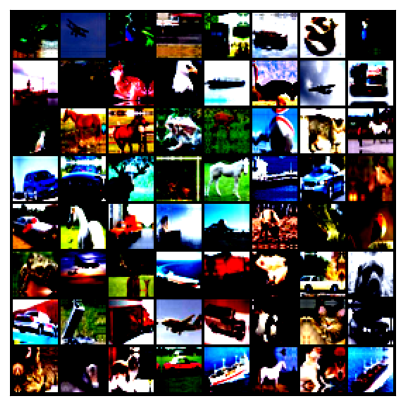

In [11]:
show_batch(train_dl)

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Device Assignment </p>

**In order to ensure that PyTorch runs efficiently on available hardware, I've defined functions for checking and assigning the correct deviceCPU or GPU To run CiFAR10 dataset**

In [12]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        return len(self.dl)

In [13]:
device = get_default_device()
device

device(type='cuda')

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Integration of DeviceDataLoader</p>

In [14]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Implementation of Simple Residual Block</p>

In [15]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x 

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Applying Simple ResNet</p>

**I did Utilized a custom SimpleResidualBlock model on the CIFAR-10 dataset, verifying output shapes for a single batch, optimizing memory usage by releasing variables and clearing CUDA cache**

In [16]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([400, 3, 32, 32])


# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">training and validation of Image Classification</p>

In [17]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                   
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels) 
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()  
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;"> Applying ResNet9 Architecture</p>

In [18]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [19]:
model = to_device(ResNet9(3, 10), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">Training with One-Cycle Learning Rate</p>

In [20]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            lrs.append(get_lr(optimizer))
            sched.step()
        
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [21]:
history = [evaluate(model, val_dl)]
history

[{'val_loss': 2.2844231128692627, 'val_acc': 0.016276666894555092}]

In [22]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [23]:
%%time
history+= fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                        grad_clip=grad_clip, weight_decay=weight_decay,
                        opt_func=opt_func)

Epoch [0], last_lr: 0.00393, train_loss: 0.0183, val_loss: 0.0000, val_acc: 1.0000
Epoch [1], last_lr: 0.00935, train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [2], last_lr: 0.00972, train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [3], last_lr: 0.00812, train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [4], last_lr: 0.00556, train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [5], last_lr: 0.00283, train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [6], last_lr: 0.00077, train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
Epoch [7], last_lr: 0.00000, train_loss: 0.0000, val_loss: 0.0000, val_acc: 1.0000
CPU times: user 4min 16s, sys: 14.1 s, total: 4min 31s
Wall time: 10min 31s


# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;">visualization of Accuracy Plotter</p>

In [24]:
def plot_accuracies(history):
  accuracies = [x['val_acc'] for x in history]
  plt.plot(accuracies, '-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Accuracy vs No. of Epochs')

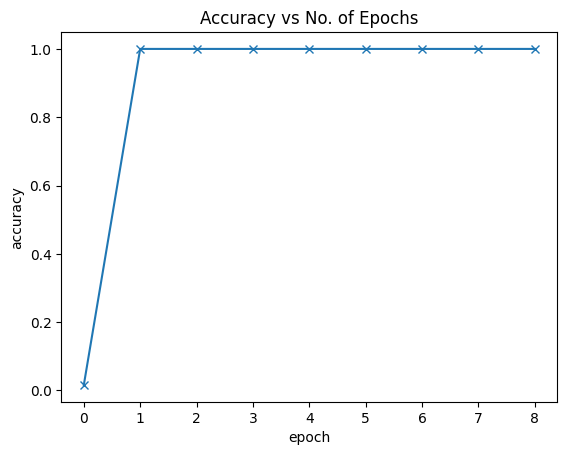

In [25]:
plot_accuracies(history)

In [26]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

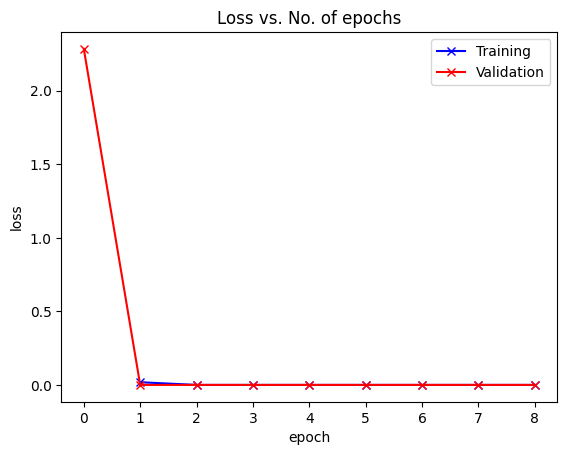

In [27]:
plot_losses(history)
plt.show()

In [28]:
def plot_lrs(history):
  lrs = np.concatenate([x.get('lrs', []) for x in history])
  plt.plot(lrs)
  plt.xlabel('Batch No')
  plt.ylabel('Learning Rate')
  plt.title('Learning Rate vs Batch Size')

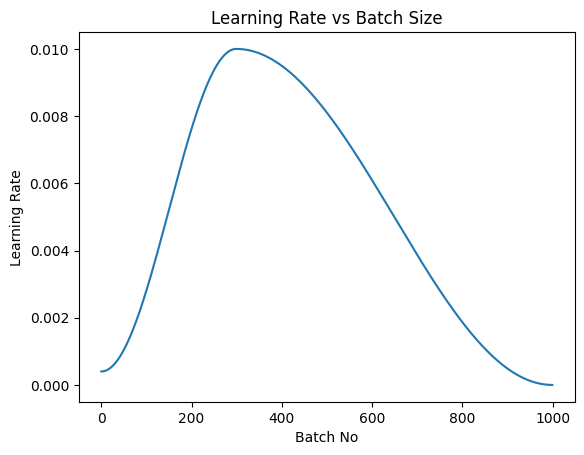

In [29]:
plot_lrs(history)

# <p style="font-family:Algerian;font-size:150%;text-align:center;color:#0F18BA;"> Conclusion</p>

In [30]:
def pred_images(img, model):
  xb = to_device(img.unsqueeze(0), device)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return train_ds.classes[preds[0].item()]

Label: train , Predicted: train


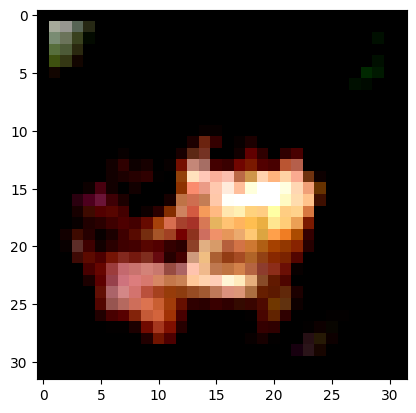

In [31]:
img, label = val_ds[2476]
plt.imshow(img.permute(1,2,0).clamp(0,1))
print('Label:', train_ds.classes[label], ', Predicted:', pred_images(img, model))